#### Data Loading

In [1]:
# Load necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

# Set path to processed data
PROCESSED_DIR = "../data/processed"

# Load all preprocessed 10-K documents into a DataFrame
documents = []
tickers = []
years = []

for fname in os.listdir(PROCESSED_DIR):
    if fname.endswith(".txt"):
        with open(os.path.join(PROCESSED_DIR, fname), "r", encoding="utf-8") as f:
            text = f.read()
        documents.append(text)

        # Extract ticker and year from filename format: TICKER_10K_YEAR.txt
        parts = fname.replace(".txt", "").split("_")
        tickers.append(parts[0])
        years.append(parts[-1])

# Create DataFrame
df = pd.DataFrame({
    "ticker": tickers,
    "year": years,
    "text": documents
})

df.head()

,ticker,year,text
0,TSLA,2024,--- ITEM_7_MDA ---\nmanagement’s discussion an...
1,TSLA,2022,--- ITEM_7_MDA ---\nmanagement’s discussion an...
2,TSLA,2023,--- ITEM_7_MDA ---\nmanagement’s discussion an...
3,AAPL,2023,--- ITEM_1_BUSINESS ---\nbusiness company back...
4,AAPL,2022,--- ITEM_1_BUSINESS ---\nbusiness company back...


#### Length Analysis

In [2]:
# Basic text statistics: character and word counts
df["n_chars"] = df["text"].apply(len)
df["n_words"] = df["text"].apply(lambda x: len(x.split()))

# Display summary statistics
df[["n_chars", "n_words"]].describe()

,n_chars,n_words
count,10.000000,10.000000
mean,349095.600000,47822.800000
std,131479.635998,20047.729613
min,212907.000000,27756.000000
25%,231288.500000,30293.500000
50%,337608.000000,44432.000000
75%,436808.750000,61514.750000
max,567415.000000,82633.000000


#### Histogram / Distribution

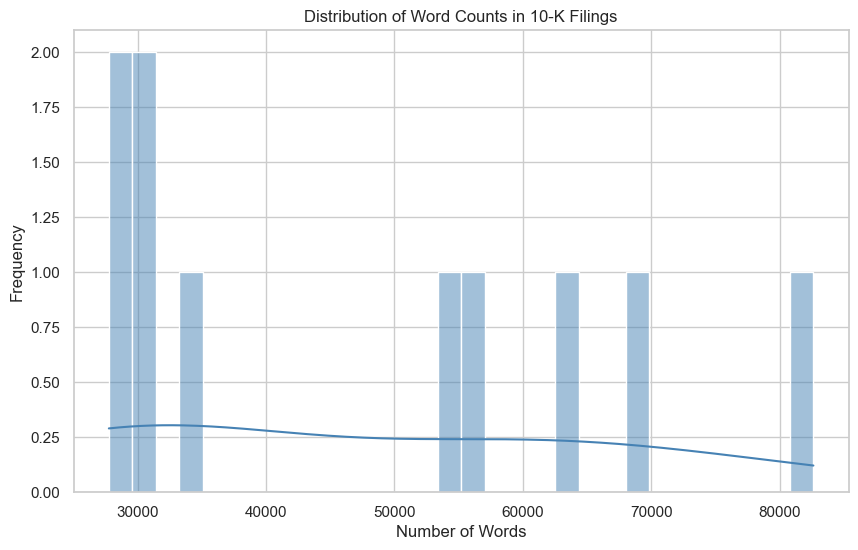

In [3]:
# Visualize the distribution of word counts per document
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df["n_words"], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Word Counts in 10-K Filings")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

#### Word Frequency